# Ensemble prediction of a precipitation extreme event

In [1]:
# Activate the following in colab : 
!pip3 install netCDF4
!apt install proj-bin libproj-dev libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
    
import xarray as xr
import math
import numpy as np
from matplotlib import pyplot as plt

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 32.3 kB of archives.
After this operation, 110 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 32.3 kB in 0s (102 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 155047 files and directories currently installed.)
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up proj-bin (4.9.3-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     \ 133.1 MB 103.5 MB/s
     |████████████████████████████████|

#### Load ensemble forecast

In [15]:
#year =  ''
#day  =  ''
#month = ''
#hour_1  =''

#url='https://thredds.met.no/thredds/dodsC/meps25epsarchive/' +year+'/'+month+'/'+day+'/meps_extracted_2_5km_'+year+month+day+'T'+hour_1+'Z.nc'
#forecast_1 = xr.open_dataset(url)


year = '2019'
day = '13'
month = '07'
hour_1 ='12'


url='https://thredds.met.no/thredds/dodsC/meps25epsarchive/' +year+'/'+month+'/'+day+'/meps_subset_2_5km_'+year+month+day+'T'+hour_1+'Z.nc'

forecast_1 = xr.open_dataset(url)

year = '2019'
day = '13'
month = '07'
hour_2 ='00'

url='https://thredds.met.no/thredds/dodsC/meps25epsarchive/' +year+'/'+month+'/'+day+'/meps_subset_2_5km_'+year+month+day+'T'+hour_2+'Z.nc'

forecast_2 = xr.open_dataset(url)

forecast_1

<xarray.Dataset>
Dimensions:                                                         (ensemble_member: 10, height0: 1, height1: 1, height3: 1, height_above_msl: 1, hybrid0: 1, hybrid2: 5, pressure: 5, time: 67, x: 889, y: 949)
Coordinates: (12/13)
  * ensemble_member                                                 (ensemble_member) int16 ...
  * height0                                                         (height0) float32 ...
  * hybrid2                                                         (hybrid2) float64 ...
  * pressure                                                        (pressure) float32 ...
  * time                                                            (time) datetime64[ns] ...
  * x                                                               (x) float32 ...
    ...                                                              ...
  * height1                                                         (height1) float32 ...
  * height3                                                         (height3) float32 ...
  * height_above_msl                                                (height_above_msl) float32 ...
  * hybrid0                                                         (hybrid0) float64 ...
    latitude                                                        (y, x) float64 ...
    longitude                                                       (y, x) float64 ...
Data variables: (12/49)
    forecast_reference_time                                         datetime64[ns] ...
    ap2                                                             (hybrid2) float64 ...
    b2                                                              (hybrid2) float64 ...
    p02                                                             float64 ...
    projection_lambert                                              int32 ...
    ap0                                                             (hybrid0) float64 ...
    ...                                                              ...
    snowfall_amount_acc                                             (time, height0, ensemble_member, y, x) float32 ...
    wind_speed_of_gust                                              (time, height3, ensemble_member, y, x) float32 ...
    x_wind_10m                                                      (time, height3, ensemble_member, y, x) float32 ...
    x_wind_pl                                                       (time, pressure, ensemble_member, y, x) float64 ...
    y_wind_10m                                                      (time, height3, ensemble_member, y, x) float32 ...
    y_wind_pl                                                       (time, pressure, ensemble_member, y, x) float64 ...
Attributes: (12/18)
    Conventions:                     CF-1.6
    institution:                     Norwegian Meteorological Institute, MET ...
    creator_url:                     met.no
    summary:                         MEPS (MetCoOp-Ensemble Prediction System...
    source:                          MEPS 2.5km
    min_time:                        2019-07-13 12:00:00Z
    ...                              ...
    license:                         https://www.met.no/en/free-meteorologica...
    comment:                         none
    title:                           MEPS subset 2.5km
    history:                         Tue Oct 13 07:53:55 2020: ncatted -O -a ...
    NCO:                             "4.6.0"
    DODS_EXTRA.Unlimited_Dimension:  time

### Plot forecast on a map
(Example plots the precipitation at timestep 36, i.e. accumulated over 36 hours.)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: The following kwargs were not used by contour: 'extemd'


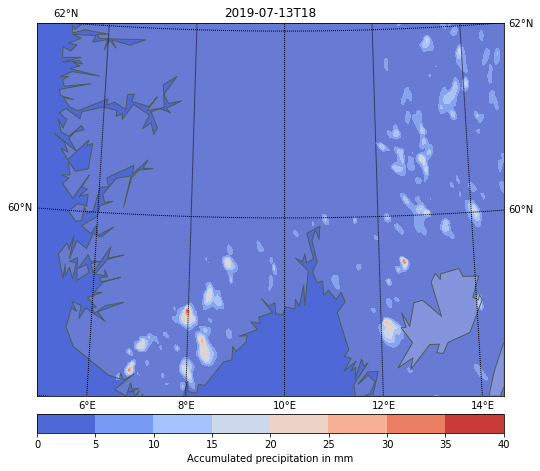

In [3]:
from mpl_toolkits.basemap import Basemap

timestep_1=6
mlevel=0
memb=2 # Ensemble member

fig = plt.figure(figsize=(7.2,7.2)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=10, lat_0=60.4, 
            resolution='l', 
            llcrnrlat= 58.0, urcrnrlat=62.0, llcrnrlon=5.0, urcrnrlon=15.0)
 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,2); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,2); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)

x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.

cs=m.contourf(x,y,np.array( forecast_1.precipitation_amount_acc[timestep_1,mlevel,memb,:,:]),cmap=plt.cm.coolwarm,extemd='max')

plt.title (np.datetime_as_string(forecast_1.time[timestep_1],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Accumulated precipitation in mm')                  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: The following kwargs were not used by contour: 'extemd'


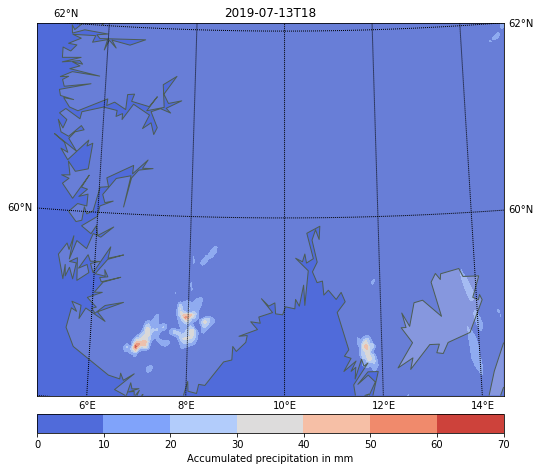

In [4]:
timestep_1=12
mlevel=0
memb=2 # Ensemble member

fig = plt.figure(figsize=(7.2,7.2)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=10, lat_0=60.4, 
            resolution='l', 
            llcrnrlat= 58.0, urcrnrlat=62.0, llcrnrlon=5.0, urcrnrlon=15.0)
 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,2); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,2); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)

x, y = m(np.array(forecast_2.longitude),np.array(forecast_2.latitude))               # compute map proj coordinates.

cs=m.contourf(x,y,np.array( forecast_2.precipitation_amount_acc[timestep_1,mlevel,memb,:,:]),cmap=plt.cm.coolwarm,extemd='max')

plt.title (np.datetime_as_string(forecast_2.time[timestep_1],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Accumulated precipitation in mm')

###Plot the spatial maps of 6-hour accumulated precipitation for different ensemble members.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'extemd'


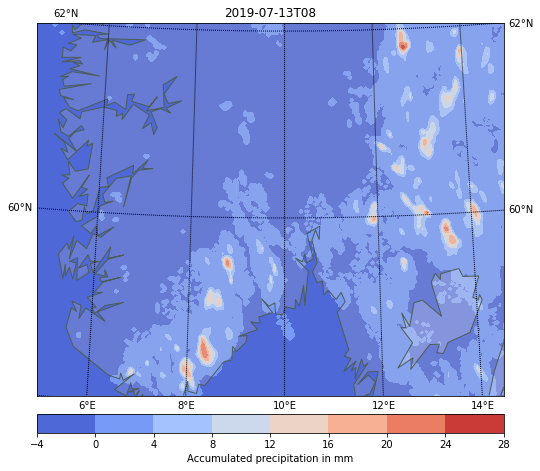

In [13]:
timestep_1=8
timestep_2=2
mlevel=0
memb=2 # Ensemble member

fig = plt.figure(figsize=(7.2,7.2)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=10, lat_0=60.4, 
            resolution='l', 
            llcrnrlat= 58.0, urcrnrlat=62.0, llcrnrlon=5.0, urcrnrlon=15.0)
 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,2); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,2); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)

x, y = m(np.array(forecast_2.longitude),np.array(forecast_2.latitude))               # compute map proj coordinates.


#Accumulated for a timestep, subtracting so i only get 6 timesteps
cs=m.contourf(x,y,np.array( forecast_1.precipitation_amount_acc[timestep_1,mlevel,memb,:,:]- forecast_1.precipitation_amount_acc[timestep_2,mlevel,memb,:,:]),cmap=plt.cm.coolwarm,extemd='max')


plt.title (np.datetime_as_string(forecast_2.time[timestep_1],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Accumulated precipitation in mm')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'extemd'


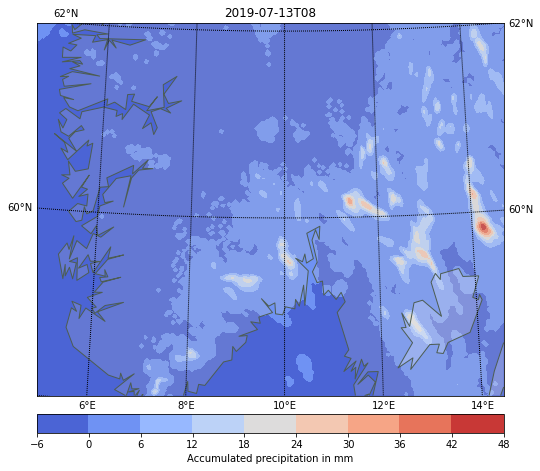

In [14]:
memb=3
fig = plt.figure(figsize=(7.2,7.2)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=10, lat_0=60.4, 
            resolution='l', 
            llcrnrlat= 58.0, urcrnrlat=62.0, llcrnrlon=5.0, urcrnrlon=15.0)
 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,2); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,2); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)

x, y = m(np.array(forecast_2.longitude),np.array(forecast_2.latitude))               # compute map proj coordinates.


#Accumulated for a timestep, subtracting so i only get 6 timesteps
cs=m.contourf(x,y,np.array( forecast_1.precipitation_amount_acc[timestep_1,mlevel,memb,:,:]- forecast_1.precipitation_amount_acc[timestep_2,mlevel,memb,:,:]),cmap=plt.cm.coolwarm,extemd='max')


plt.title (np.datetime_as_string(forecast_2.time[timestep_1],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Accumulated precipitation in mm')

3.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: The following kwargs were not used by contour: 'extemd'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: The following kwargs were not used by contour: 'extemd'


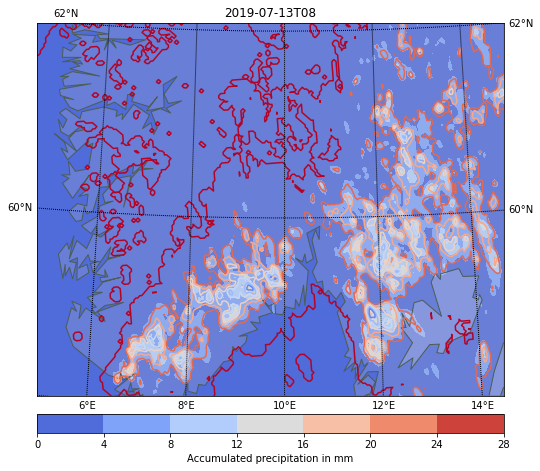

In [33]:
#Mean
tot=0
enmemb=0


for i in range(10):
    memb=i
    tot=tot+1
    enmemb=enmemb+forecast_1.precipitation_amount_acc[timestep_1,mlevel,memb,:,:]

mean=enmemb/tot


fig = plt.figure(figsize=(7.2,7.2)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=10, lat_0=60.4, 
            resolution='l', 
            llcrnrlat= 58.0, urcrnrlat=62.0, llcrnrlon=5.0, urcrnrlon=15.0)
 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,2); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,2); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)

x, y = m(np.array(forecast_2.longitude),np.array(forecast_2.latitude))               # compute map proj coordinates.



precip=forecast_1.precipitation_amount_acc[timestep_1,mlevel,:,:,:]

#meanpp=precip.mean('ensemble_member')
stdpp=precip.std('ensemble_member')

#Plotting mean
cs=m.contour(x,y,np.array( mean),cmap=plt.cm.coolwarm_r,extemd='max')
cs=m.contourf(x,y,np.array( stdpp),cmap=plt.cm.coolwarm,extemd='max')

plt.title (np.datetime_as_string(forecast_2.time[timestep_1],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Accumulated precipitation in mm')


#Combining mean and standard deviation to combine information from all ensamble members
